In [1]:
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [42]:
import pickle
model = 'Llama'
k=4

results_dicts = dict()
for dataset_name in ['agnews', 'financial_phrasebank', 'glue_sst2', 'rotten_tomatoes', 'sst5', 'subjective', 'trec', 'tweet_eval_emotion', 'tweet_eval_hate']:
    file_path = f"results/results_k_[{k}]_seeds_5_datasets_['{dataset_name}']_models_['{model}'].pkl"
    with open(file_path,'rb') as f:
        results_dicts[dataset_name] = pickle.load(f)

baseline_results_dicts = dict()
for dataset_name in ['agnews', 'financial_phrasebank', 'glue_sst2', 'rotten_tomatoes', 'sst5', 'subjective', 'trec', 'tweet_eval_emotion', 'tweet_eval_hate']:
    try:
        file_path = f"results/results_k_[{k}]_seeds_5_datasets_['{dataset_name}']_models_['{model}']_baselines.pkl"
        with open(file_path,'rb') as f:
            baseline_results_dicts[dataset_name] = pickle.load(f)
    except:
        print(f'Cannot find baseline for {dataset_name}')


Cannot find baseline for sst5
Cannot find baseline for trec


In [31]:
def generate_plot(results_dicts_list, dataset_name, methods_to_compare, metrics):
    
    plt.figure(figsize=(20,20))
    methods_perms = dict()
    for method in methods_to_compare:
        methods_perms[method] = []
    
    for results_dicts in results_dicts_list:
    
        outcomes = results_dicts[dataset_name][model]['results_dic']
        outcomes = outcomes[list(outcomes.keys())[0]]

        for seed in outcomes:
            outcome = outcomes[seed][f'{k}']
            for m in outcome:
                if m in methods_to_compare:
                    methods_perms[m].append(outcome[m])
    
        
    for i, metric in enumerate(metrics):
    
        values_to_plot = []
        for method in methods_to_compare:
            values_to_plot.append(np.mean(np.array([d[metric] for d in methods_perms[method]])))
        plt.subplot(int(f'41{i+1}'))
        plt.scatter(methods_to_compare, values_to_plot)
        plt.title(metric)

In [32]:
methods_to_compare = ['Baseline', 'CC', 'Domain', 'Batch', 'LR-average_voting',\
                      'LR-0','LR-1-average_voting','LR-2-average_voting','LR-3-average_voting']
metrics = ['accuracy','averaged_truelabel_likelihood','macro_F1','expected_calibration_error_1']

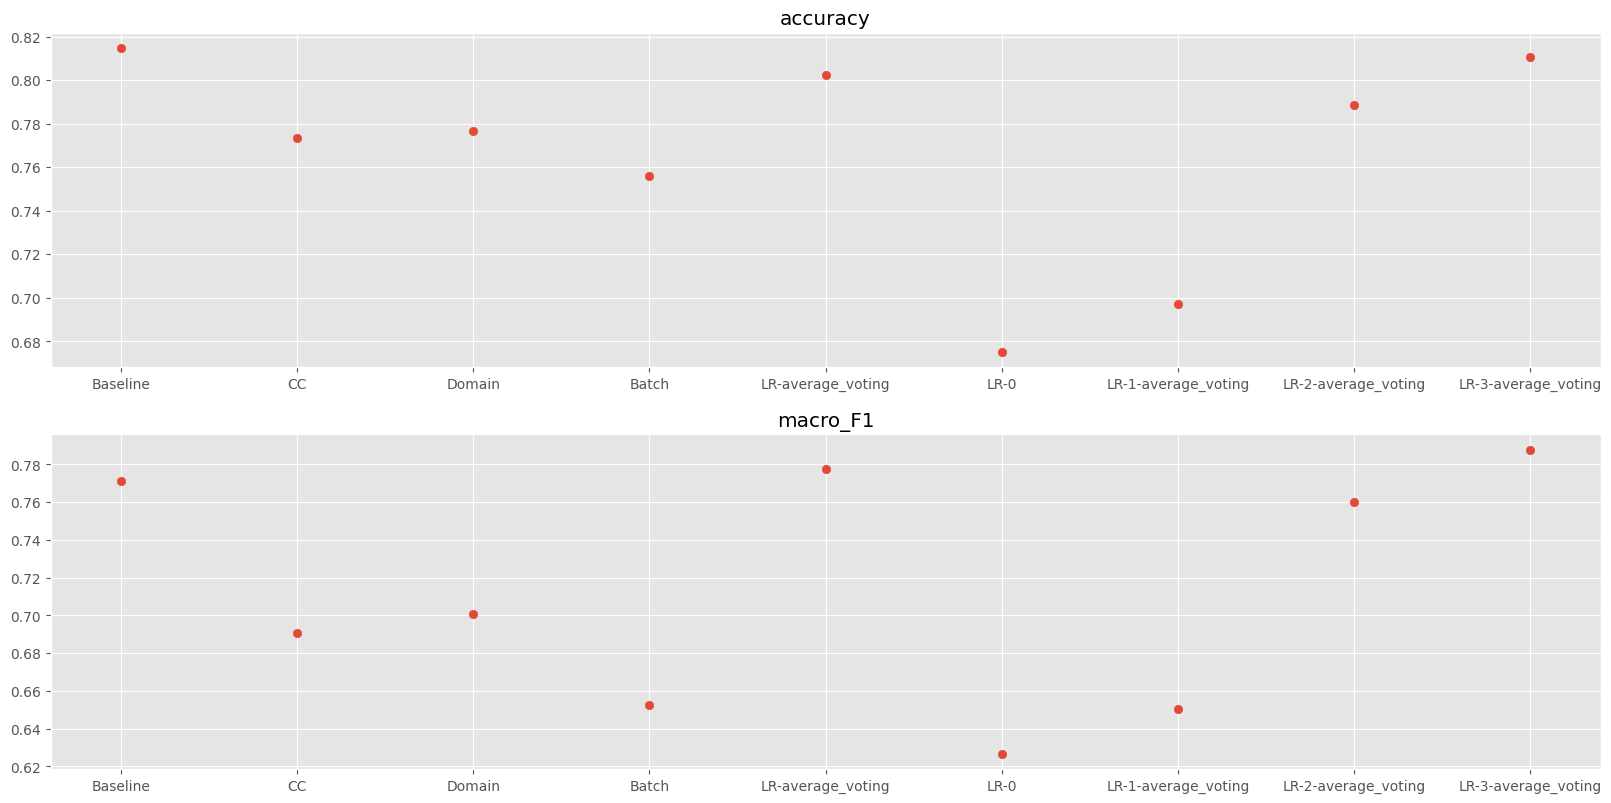

In [35]:
generate_plot([results_dicts,baseline_results_dicts], 'agnews', methods_to_compare, ['accuracy','macro_F1'])

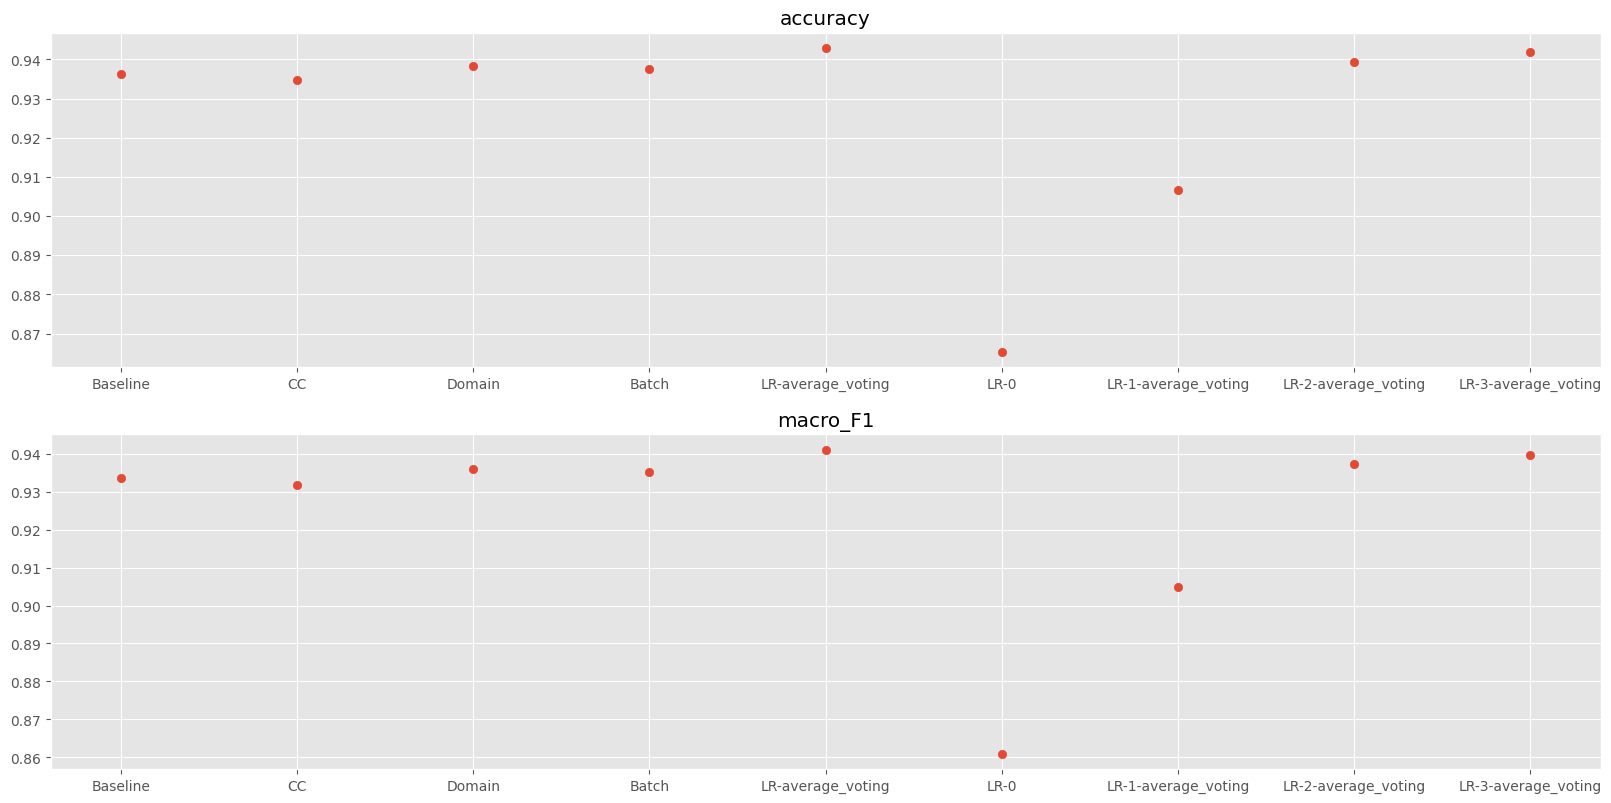

In [37]:
generate_plot([results_dicts,baseline_results_dicts], 'glue_sst2', methods_to_compare, ['accuracy','macro_F1'])

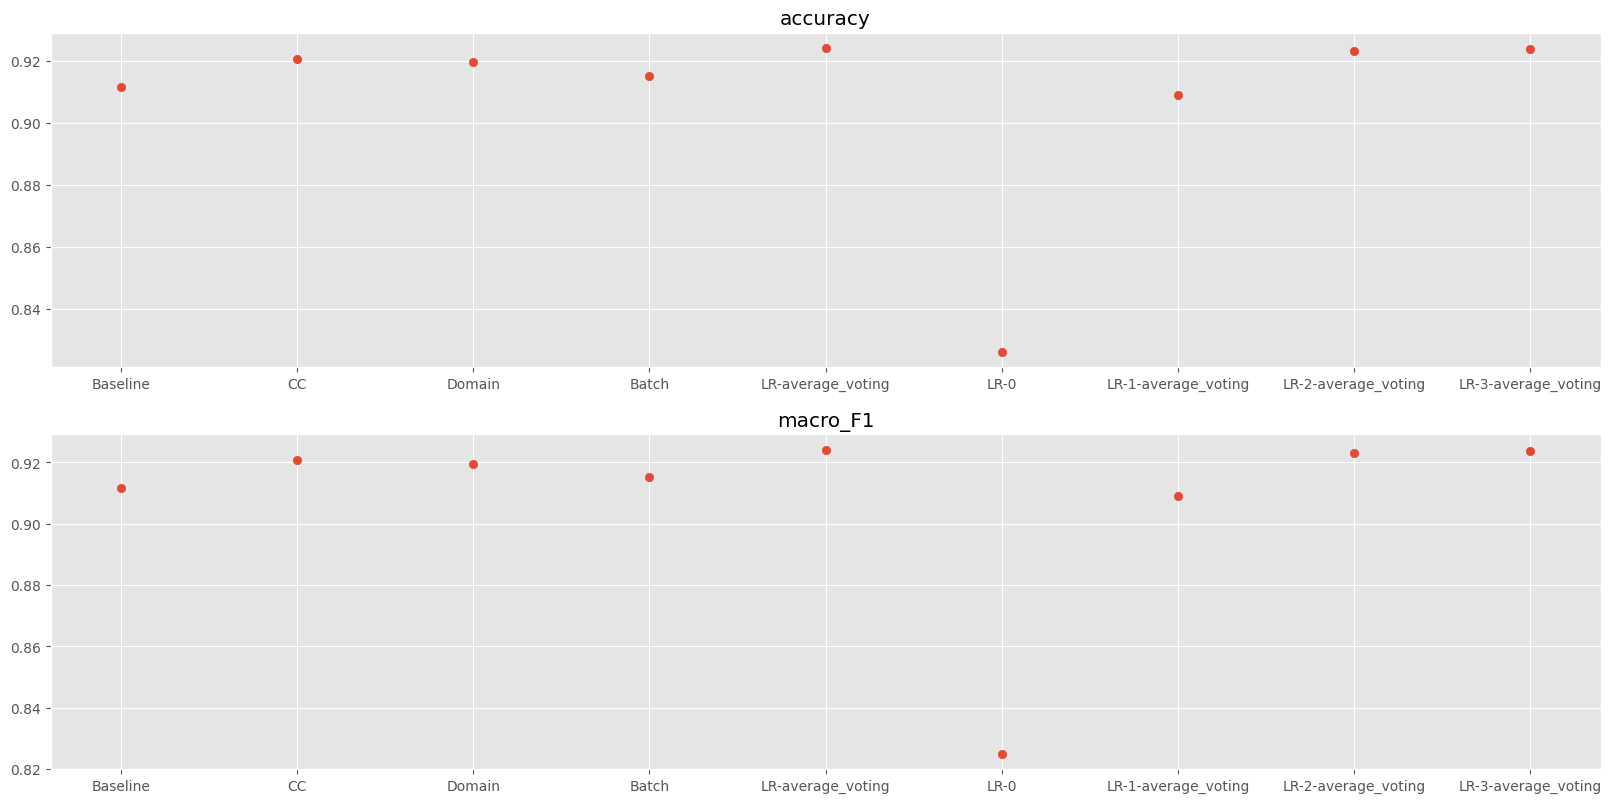

In [36]:
generate_plot([results_dicts,baseline_results_dicts], 'rotten_tomatoes', methods_to_compare, ['accuracy','macro_F1'])

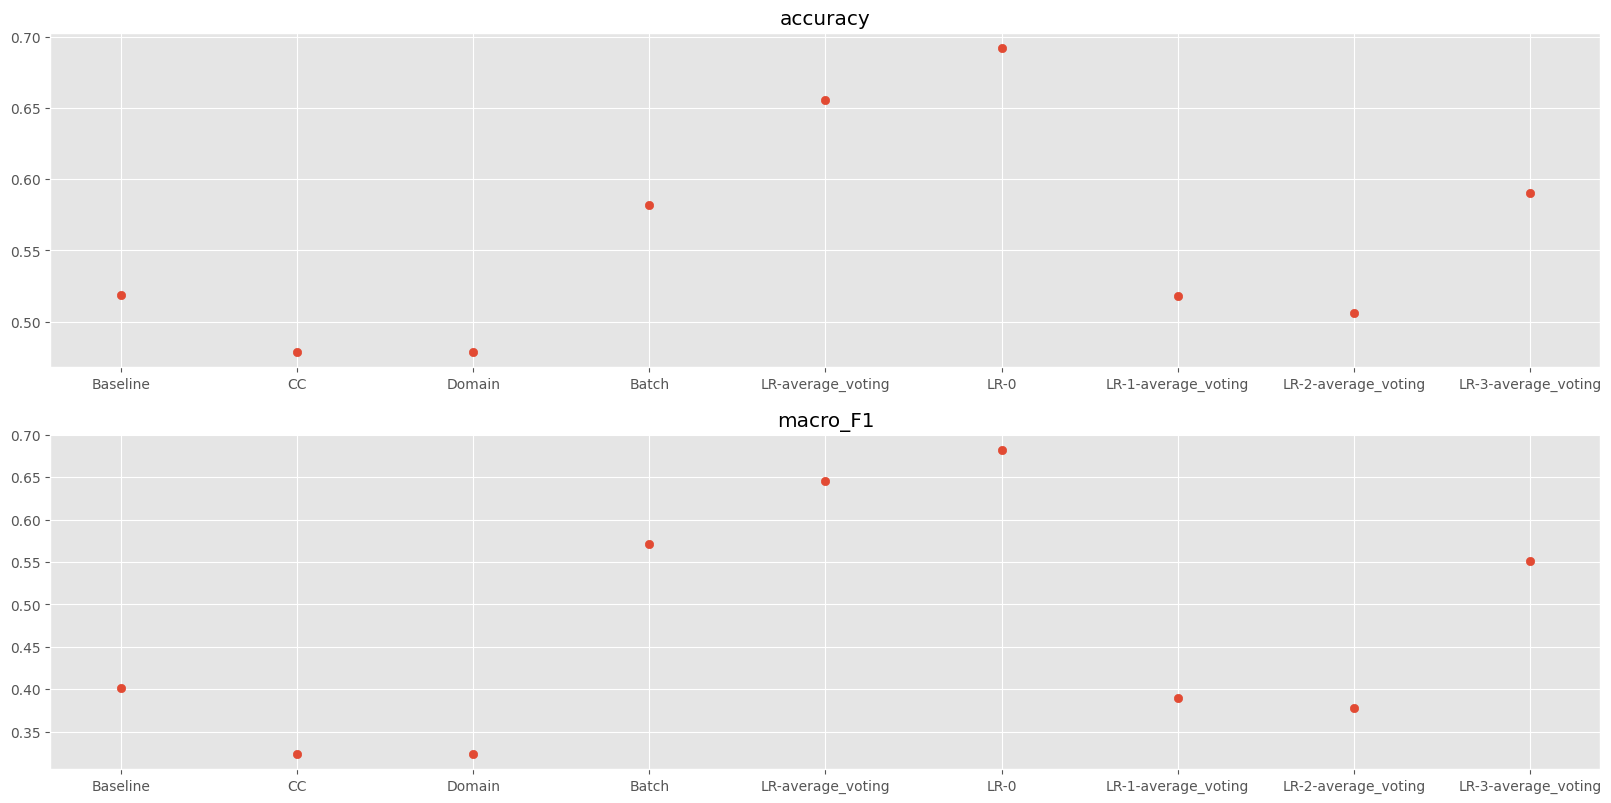

In [39]:
generate_plot([results_dicts,baseline_results_dicts], 'subjective', methods_to_compare, ['accuracy','macro_F1'])

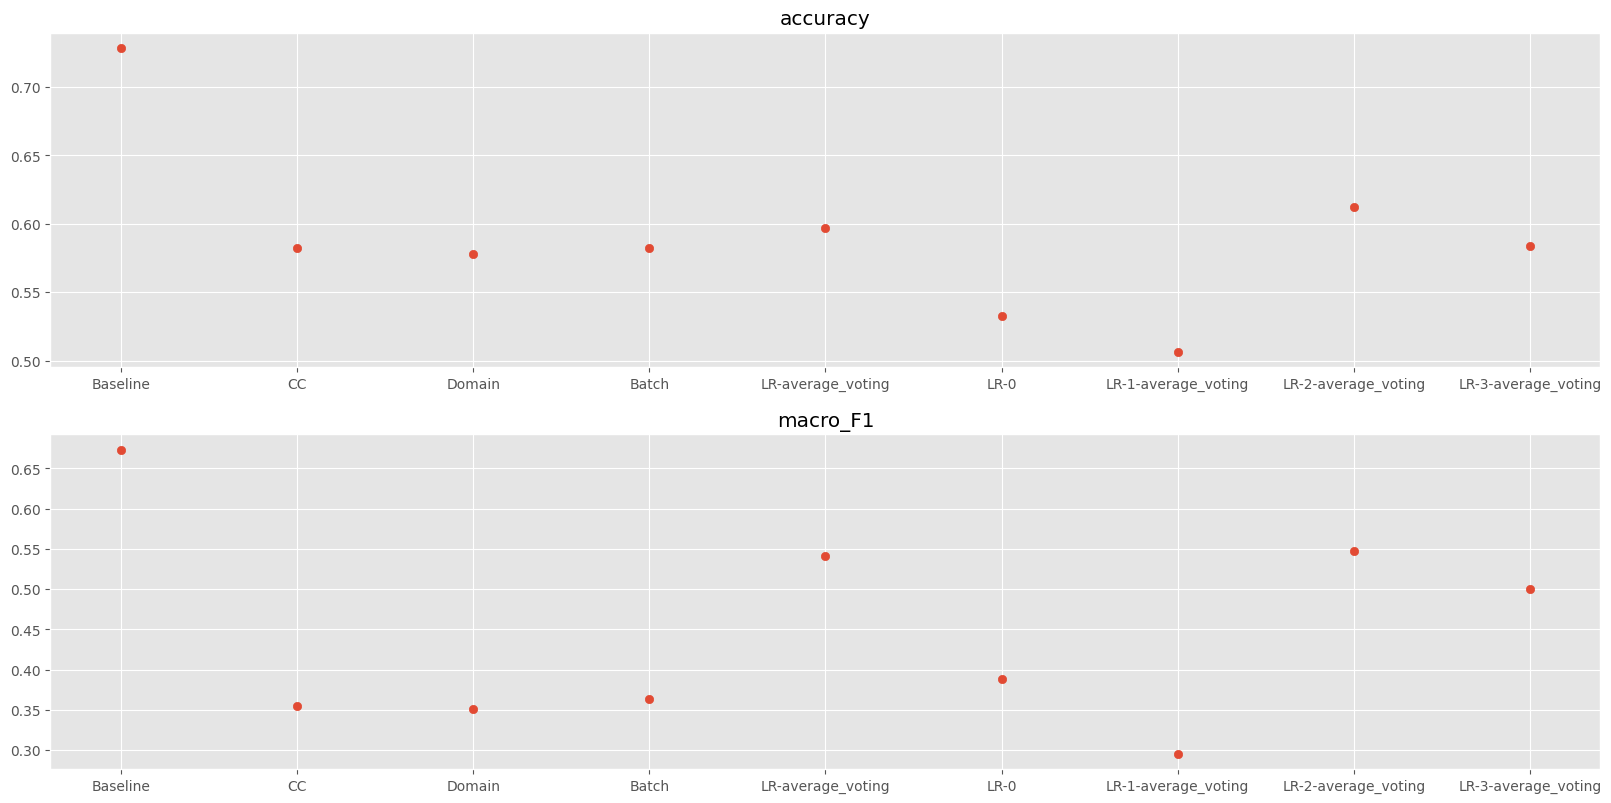

In [40]:
generate_plot([results_dicts,baseline_results_dicts], 'tweet_eval_emotion', methods_to_compare, ['accuracy','macro_F1'])

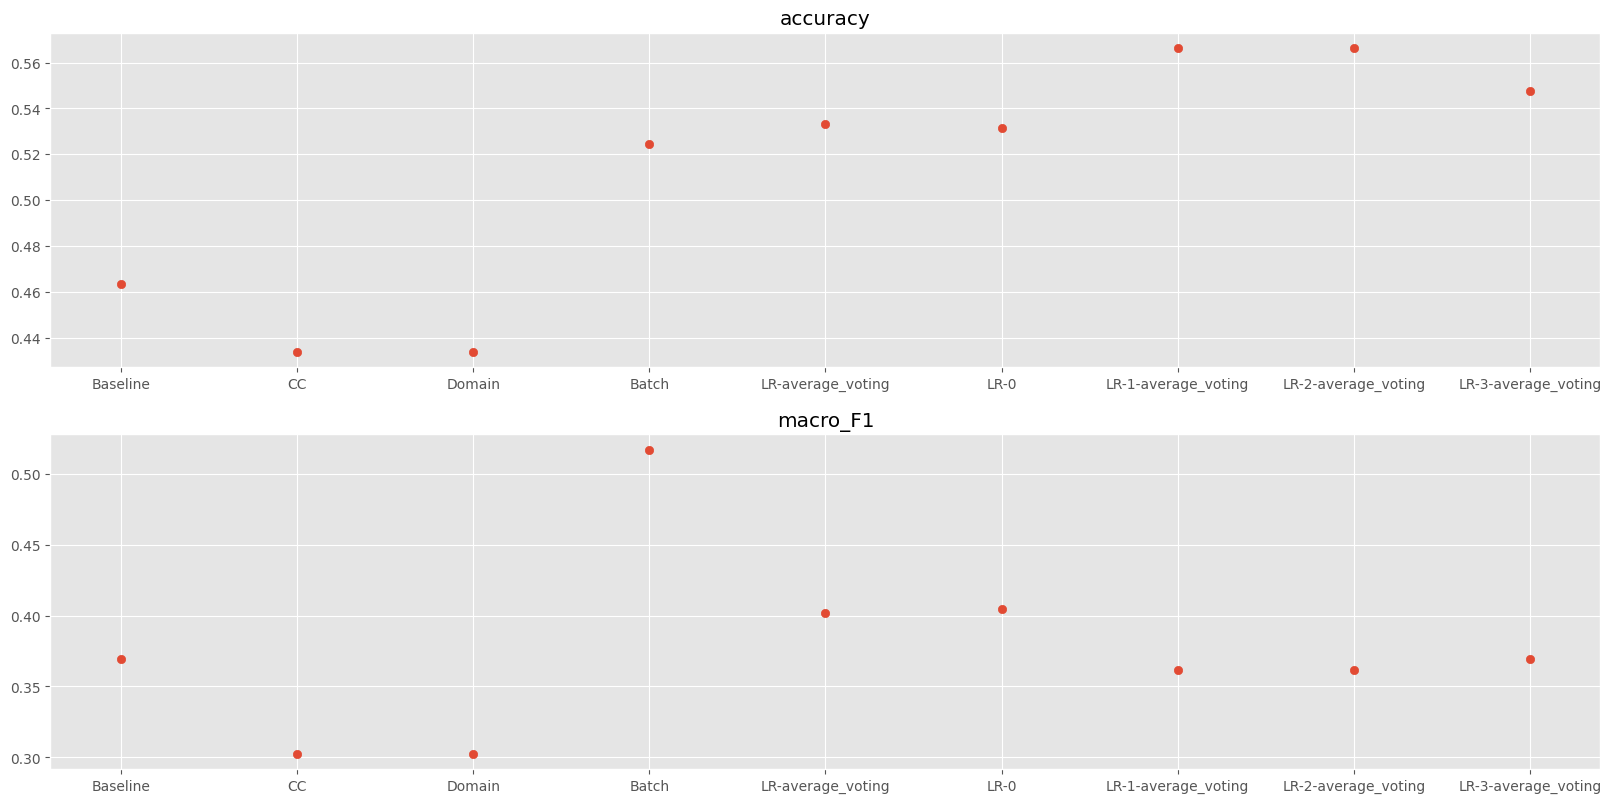

In [43]:
generate_plot([results_dicts,baseline_results_dicts], 'tweet_eval_hate', methods_to_compare, ['accuracy','macro_F1'])

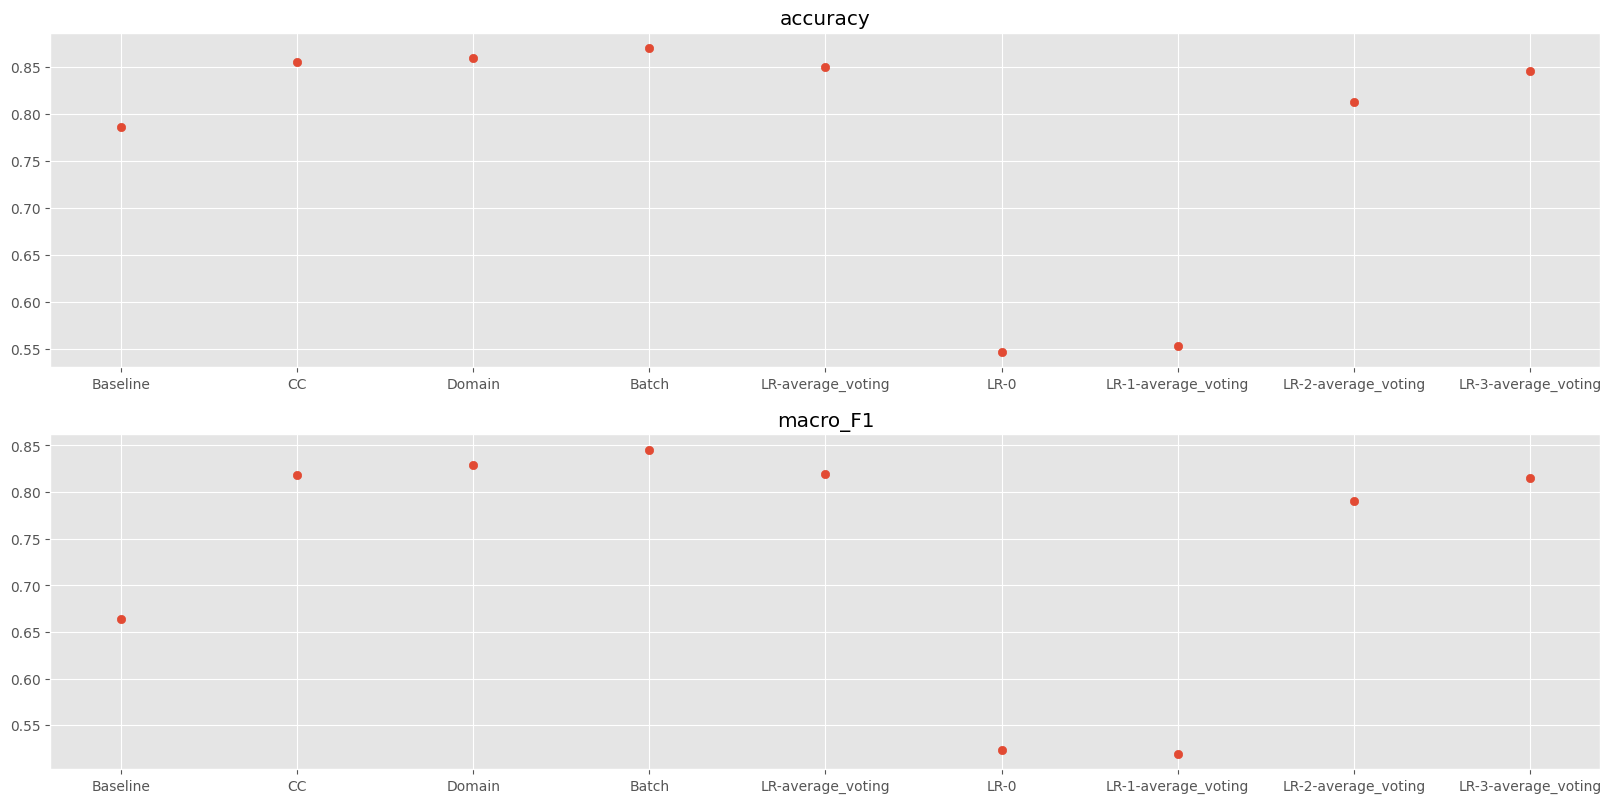

In [34]:
generate_plot([results_dicts,baseline_results_dicts], 'financial_phrasebank', methods_to_compare, ['accuracy','macro_F1'])

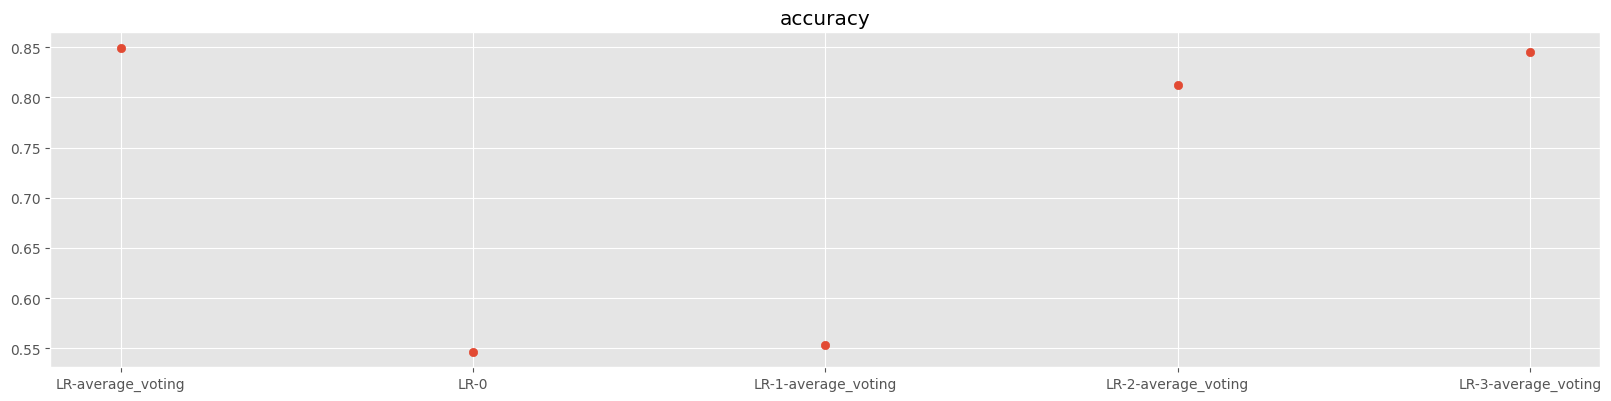

In [9]:
generate_plot(results_dicts, 'financial_phrasebank', methods_to_compare, ['accuracy'])